# **배치 정규화, relu**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
(train_images, train_labels),  (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
validation_images = train_images[:5000]
validation_labels = train_labels[:5000]

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
model_A = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.Dense(200, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])                                 

In [ ]:
model_A.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 300)               235200    
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200      
_________________________________________________________________
activation_18 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 200)               60000     
_________________________________________________________________
batch_normalization_7 (Batch (None, 200)               800       
_________________________________________________________________
activation_19 (Activation)   (None, 200)              

In [ ]:
#model.layers[2].variables

In [ ]:
for variable in model_A.layers[2].variables:
    print(variable.name)

batch_normalization_6/gamma:0
batch_normalization_6/beta:0
batch_normalization_6/moving_mean:0
batch_normalization_6/moving_variance:0


In [ ]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_A.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [ ]:
model_A.fit(train_images, train_labels, epochs=60, validation_data=(validation_images, validation_labels))

Epoch 1/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5646 - accuracy: 0.8003 - val_loss: 0.3343 - val_accuracy: 0.8764
Epoch 2/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3550 - accuracy: 0.8684 - val_loss: 0.3089 - val_accuracy: 0.8796
Epoch 3/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3106 - accuracy: 0.8875 - val_loss: 0.2490 - val_accuracy: 0.9054
Epoch 4/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2816 - accuracy: 0.8953 - val_loss: 0.2199 - val_accuracy: 0.9188
Epoch 5/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2643 - accuracy: 0.9016 - val_loss: 0.2388 - val_accuracy: 0.9092
Epoch 6/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2507 - accuracy: 0.9064 - val_loss: 0.2071 - val_accuracy: 0.9222
Epoch 7/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2291 - accuracy: 0.9134 - val_loss: 0.2013 - val_accuracy:

In [ ]:
model_A.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.8912


[0.550532877445221, 0.8912000060081482]

# **MLP 모델에 학습 개선 방법 적용해보기**
1. 가중치 초기화(Weight Initialization)   
2. 활성화함수(Activation Function)   
3. 최적화(Optimization)
4. 배치 정규화
5. 드롭아웃

## base MLP 모델 만들기

#### MNIST 데이터 셋 불러오기

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


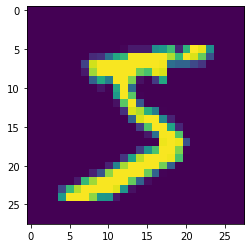

Label:  5


In [ ]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

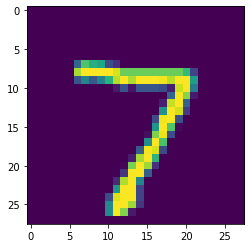

Label:  7


In [ ]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [2]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# 학습 과정을 단축시키기 위해 학습 데이터의 1/3만 활용한다
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

# 타겟 변수를 one-hot encoding 한다
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


In [4]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# MLP (4 hidden layers)
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

model = Sequential()
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 0)

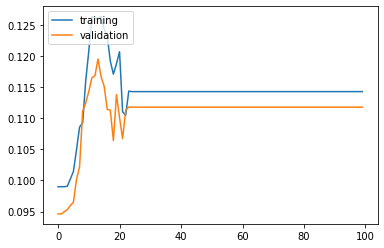

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 1ms/step - loss: 2.2989 - accuracy: 0.1135
Test accuracy:  0.11349999904632568


### 1. 가중치 초기화

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

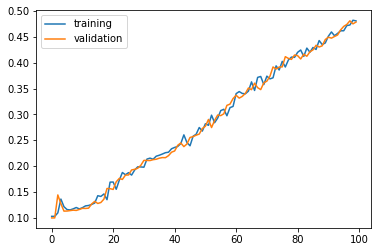

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 1ms/step - loss: 1.8338 - accuracy: 0.4786
Test accuracy:  0.47859999537467957


### 2. 활성화 함수

In [ ]:
def mlp_model_relu():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model_relu()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

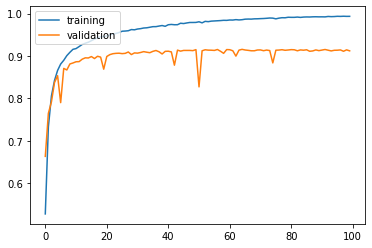

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.5660 - accuracy: 0.9113
Test accuracy:  0.911300003528595


### 3. 옵티마이저

In [ ]:
def mlp_model_optimizer():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    RMSProp = optimizers.RMSprop(lr=0.001)
    model.compile(optimizer = RMSProp, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model_optimizer()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

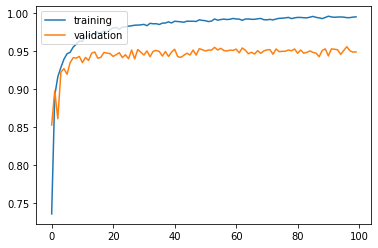

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 1ms/step - loss: 4.3258 - accuracy: 0.9501
Test accuracy:  0.9501000046730042


### 4. 배치 정규화

In [ ]:
from keras.layers import BatchNormalization
def mlp_model_BN():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())             # Add Batchnorm layer before Activation
    model.add(Activation('relu'))   
    model.add(Dense(50))
    model.add(BatchNormalization())             # Add Batchnorm layer before Activation
    model.add(Activation('relu'))   
    model.add(Dense(50))
    model.add(BatchNormalization())             # Add Batchnorm layer before Activation
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())             # Add Batchnorm layer before Activation
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    RMSProp = optimizers.RMSprop(lr=0.001)
    model.compile(optimizer = RMSProp, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model_BN()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

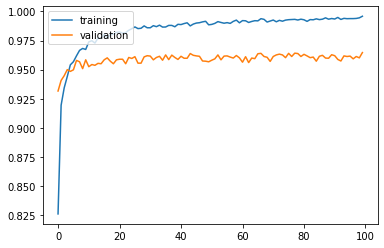

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.2338 - accuracy: 0.9652
Test accuracy:  0.9652000069618225


### 5. 드랍아웃

In [ ]:
from keras.layers import Dropout
def mlp_model_dropout():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())             # Add Batchnorm layer before Activation
    model.add(Activation('relu'))  
    model.add(Dropout(0.2))   
    model.add(Dense(50))
    model.add(BatchNormalization())             # Add Batchnorm layer before Activation
    model.add(Activation('relu')) 
    model.add(Dropout(0.2))    
    model.add(Dense(50))
    model.add(BatchNormalization())             # Add Batchnorm layer before Activation
    model.add(Activation('relu')) 
    model.add(Dropout(0.2))     
    model.add(Dense(50))
    model.add(BatchNormalization())             # Add Batchnorm layer before Activation
    model.add(Activation('relu')) 
    model.add(Dropout(0.2))     
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    RMSProp = optimizers.RMSprop(lr=0.001)
    model.compile(optimizer = RMSProp, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model_dropout()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

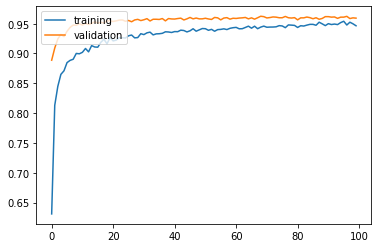

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1557 - accuracy: 0.9611
Test accuracy:  0.9610999822616577


### Gradient Clipping

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)

#**11.2 전이 학습**

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid")) # model_A에 출력층만 추가

In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",
                     metrics=["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

optimizer = keras.optimizers.SGD(lr=1e-4)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

#**11.3 고속 옵티마이저**

모멘텀 최적화

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

네스테로프 모멘텀 최적화

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

RMSprop

In [ ]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

Adam

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

### 학습률 스케줄링

거듭제곱 기반 스케줄링

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

지수 기반 스케줄링

In [ ]:
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1**(epoch/s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)


lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, callbacks=[lr_scheduler])

# **11.4 규제**

## **l1, l2 규제**

In [ ]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernal_regularizer=keras.regularizers.l2(0.01))

In [ ]:
from functools import partial

RegularizeDense = partial(keras.layers.Dense,
                          activation="elu",
                          kernal_initializer="he_normal",
                          kernal_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28, 28]),
                                 RegularizeDense(300),
                                 RegularizeDense(100),
                                 RegularizeDense(10, activation="softmax",
                                                 kernal_initializer="glorot_uniform")
])

# **11.4.2 드롭아웃**

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Dense(10, activation="softmax")

])

### MC 드롭아웃 (Monte Carlo Dropout)

In [ ]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)

np.round(model.predict(X_test_scaled[:1]), 2)


In [ ]:
np.round(y_probas[:, :1], 2)

In [ ]:
np.round(y_probas[:1], 2)

In [ ]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)